In [1]:
from datetime import datetime
from typing import Dict
import config
import logging
import numpy as np
import os
import time

from torch.utils.data import DataLoader

from datasets import KAISTPedWS
from utils import utils
from utils.evaluation_script import evaluate

In [2]:
args = config.args
train_conf = config.train
checkpoint = train_conf.checkpoint
start_epoch = train_conf.start_epoch
epochs = train_conf.epochs
phase = "Multispectral"

weak_dataset = KAISTPedWS(args, "weak", condition='train')
weak_loader = DataLoader(weak_dataset, batch_size=1, shuffle=True,
                            num_workers=config.dataset.workers,
                            collate_fn=weak_dataset.collate_fn,
                            pin_memory=True)  # note that we're passing the collate function here

strong_dataset = KAISTPedWS(args, "strong", condition='train')
strong_loader = DataLoader(strong_dataset, batch_size=1, shuffle=True,
                            num_workers=config.dataset.workers,
                            collate_fn=strong_dataset.collate_fn,
                            pin_memory=True)  # note that we're passing the collate function here

In [3]:
weak_img = next(iter(weak_loader))
strong_img = next(iter(strong_loader))

In [4]:
weak_img = weak_img[0][0].numpy().reshape((512, 640, 3))
strong_img = strong_img[0][0].numpy().reshape((512, 640, 3))

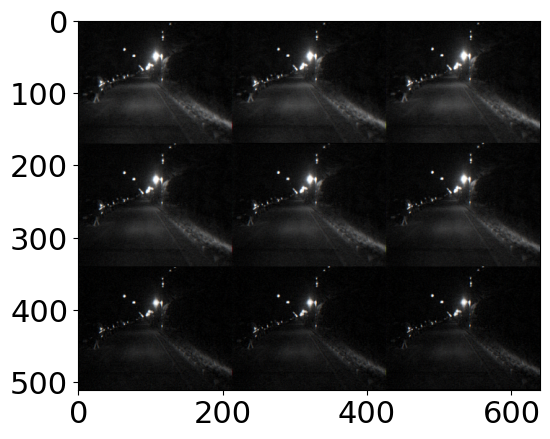

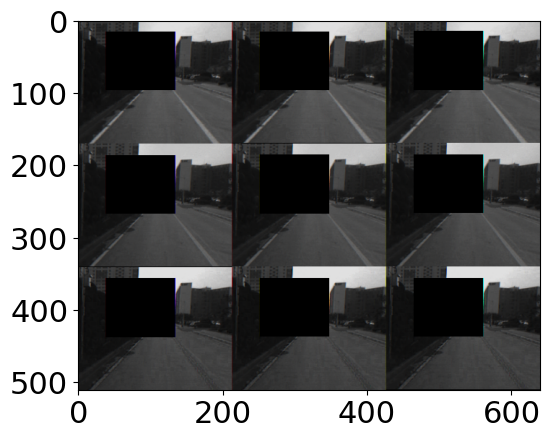

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(weak_img)
plt.show()
plt.imshow(strong_img)
plt.show()

1 2 3 4
